In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Necesario para crear datos aleatorios

from src import soporte_correlacion as sp_corr
from src import soporte_EDA as sp_eda

### Carga

In [4]:
df_flights = pd.read_csv("files\\Customer Flight Activity.csv")
df_customers = pd.read_csv("files\\Customer Loyalty History.csv")
pd.set_option("display.max_columns", None)

### EDA: Exploración inicial. Customer Flight Activity

In [43]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [44]:
print(f"El número de filas que tenemos es {df_flights.shape[0]} y el número de columnas es {df_flights.shape[1]}")

El número de filas que tenemos es 405624 y el número de columnas es 10


In [45]:
df_flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [46]:
round (df_flights.isna().sum()/df_flights.shape[0]*100,2)

#no hay nulos 

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [47]:
df_flights.duplicated().sum()

np.int64(1864)

In [48]:
df_flights.duplicated(subset="Loyalty Number").sum()

#números de cliente duplicados. 

np.int64(388887)

In [50]:
round(df_flights.duplicated(subset="Loyalty Number").sum()/df_flights.shape[0]*100,2)

# ¿por qué el 95.87% de los Loyalty number está duplicado? 

np.float64(95.87)

In [51]:
df_flights.describe().T

#cómo son mis variables

#por qué hay 999986.0 Loyalty Number si el total de filas es 405624. ¿Son consecutivos? ¿Faltan la mitad?

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [52]:
df_flights[df_flights.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number").head(10)

#incluir original y duplicado para ver la comparación. 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169010,100018,2017,11,13,1,14,3374,337.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
152109,100018,2017,10,6,0,6,1032,103.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36
371822,100018,2018,11,11,0,11,3058,305.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
338020,100018,2018,9,14,2,16,3568,356.0,0,0


In [53]:
df_flights["Loyalty Number"].value_counts(dropna=False, normalize=True)*100

Loyalty Number
678205    0.017750
499874    0.011834
411734    0.011834
255475    0.011834
528447    0.011834
            ...   
101515    0.005917
101540    0.005917
101544    0.005917
101547    0.005917
999891    0.005917
Name: proportion, Length: 16737, dtype: float64

In [54]:
df_flights["Loyalty Number"].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891])

ESTADÍSTICA DESCRIPTIVA 

El mínimo de Loyalty Number es 100018
El máximo de Loyalty Number es 999986
La media de Loyalty Number es 550037.8730844329
La mediana de Loyalty Number es 550834.0
--------------------
DESCRIBE ENTERO:
 count    405624.000000
mean     550037.873084
std      258935.286969
min      100018.000000
25%      326961.000000
50%      550834.000000
75%      772194.000000
max      999986.000000
Name: Loyalty Number, dtype: float64 

--------------------


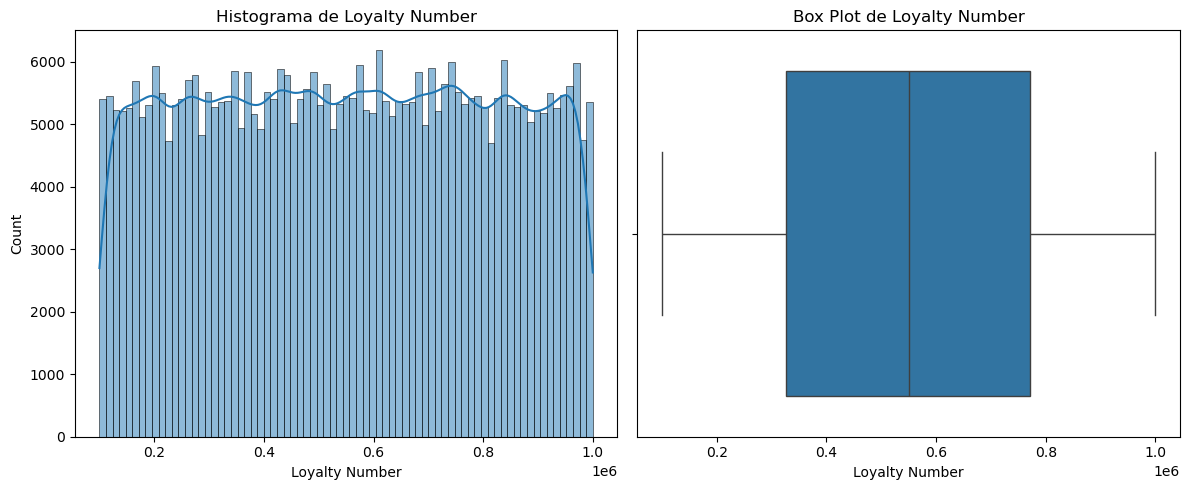

In [93]:
sp_eda.exploracion_num(df_flights, "Loyalty Number" )

### EDA: Exploración inicial. Customer Loyalty History

In [5]:
df_customers.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
print(f"El número de filas que tenemos es {df_customers.shape[0]} y el número de columnas es {df_customers.shape[1]}")

El número de filas que tenemos es 16737 y el número de columnas es 16


In [7]:
df_customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [ ]:
round (df_customers.isna().sum()/df_customers.shape[0]*100,2)

#nulos en Cancellation porque siguen activos


Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [ ]:
df_customers.duplicated().sum()
#no hay duplicados

np.int64(0)

In [10]:
df_customers.describe().T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [11]:
df_customers["Loyalty Number"].value_counts(dropna=False, normalize=True)*100

Loyalty Number
652627    0.005975
954587    0.005975
909547    0.005975
464394    0.005975
154981    0.005975
            ...   
530508    0.005975
193662    0.005975
927943    0.005975
188893    0.005975
852392    0.005975
Name: proportion, Length: 16737, dtype: float64

In [12]:
df_customers["Loyalty Number"].unique()

array([480934, 549612, 429460, ..., 776187, 906428, 652627])

ESTADÍSTICA DESCRIPTIVA 

El mínimo de Loyalty Number es 100018
El máximo de Loyalty Number es 999986
La media de Loyalty Number es 549735.8804445241
La mediana de Loyalty Number es 550434.0
--------------------
DESCRIBE ENTERO:
 count     16737.000000
mean     549735.880445
std      258912.132453
min      100018.000000
25%      326603.000000
50%      550434.000000
75%      772019.000000
max      999986.000000
Name: Loyalty Number, dtype: float64 

--------------------


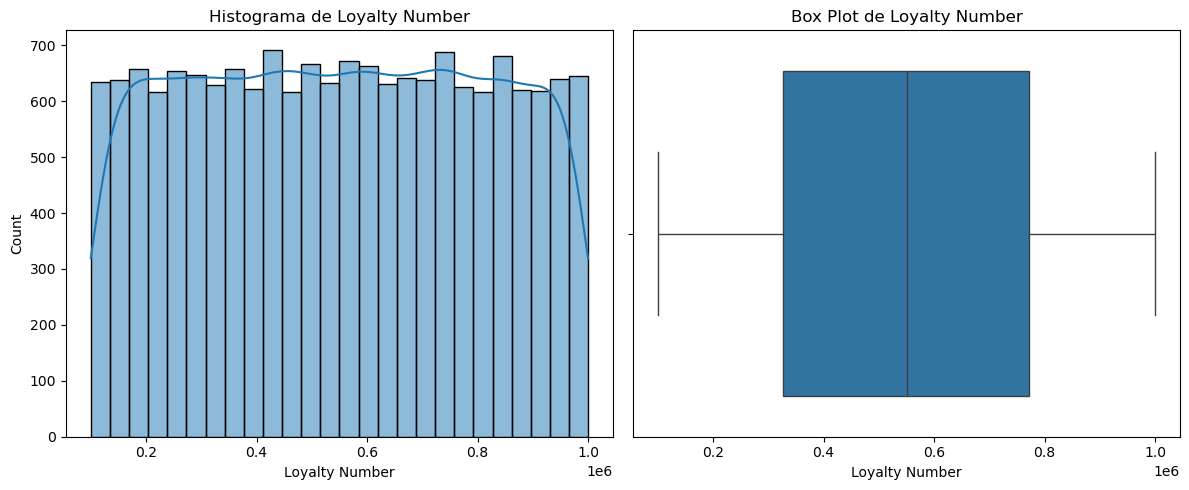

In [13]:
sp_eda.exploracion_num(df_customers, "Loyalty Number" )

## Unión dataframes

## Estadística descriptiva

In [1]:
sp_corr.comparar_correlaciones(df_flights, df_flights["Loyalty Number"], df_flights["Flights Booked"], umbral_diferencia=0.1, mostrar_plot=True)

NameError: name 'sp_corr' is not defined